        Name: Ashwini Giri          USC ID: 5413882039                 Team: Vectors

### This notebook is created to undersatnd the data, patters of foot traffic, K-Means experimentation on differenct features and also experimenting with PCA to reduce data dimentionality.

In [28]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.dates as md
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
employees = pd.read_csv('employees.csv')
visitors = pd.read_csv('visitors.csv')
visit = pd.read_csv('visitors.csv')
level5month4 = pd.read_csv('level4month4.csv')

In [6]:
level5month4.drop(['Unnamed: 0','ClientMacAddr','lat','lng'],inplace=True,axis=1)

In [7]:
level5month4.head()

,timestamp,hours,month,day,DayOfTheWeek,newlat,newlng
0,2018-04-15 21:08:06,21,4,15,6,0.051215,-0.472108
1,2018-04-11 09:44:21,9,4,11,2,-0.041590,-0.472108
2,2018-04-11 13:14:00,13,4,11,2,0.031123,-0.472108
3,2018-04-11 11:52:45,11,4,11,2,0.143064,-0.472108
4,2018-04-11 13:52:34,13,4,11,2,-2.243089,-0.472108


In [10]:
visitors.head()

,Unnamed: 0,ClientMacAddr,lat,lng,timestamp,hours,month,day,DayOfTheWeek,newlat,newlng
0,14,1c:48:ce:7f:cf:e6,1.290706,103.851616,2018-04-13 10:45:06,10,4,13,4,-0.650088,-0.472108
1,20,1c:48:ce:7f:cf:e6,1.290705,103.851616,2018-04-13 11:49:42,11,4,13,4,-0.652958,-0.472108
2,26,1c:48:ce:7f:cf:e6,1.290704,103.851616,2018-04-13 12:28:45,12,4,13,4,-0.666353,-0.472108
3,62,e8:50:8b:e5:b7:b8,1.290772,103.851616,2018-04-06 12:17:55,12,4,6,4,-0.014801,-0.472108
4,69,70:81:eb:7f:61:cf,1.290771,103.851616,2018-04-06 12:16:51,12,4,6,4,-0.028196,-0.472108


In [11]:
employees.drop(['Unnamed: 0','ClientMacAddr','lat','lng'],inplace=True,axis=1)

In [12]:
visit.columns

Index(['Unnamed: 0', 'ClientMacAddr', 'lat', 'lng', 'timestamp', 'hours',
       'month', 'day', 'DayOfTheWeek', 'newlat', 'newlng'],
      dtype='object')

In [13]:
visit.drop(['Unnamed: 0','ClientMacAddr','newlat','newlng','timestamp','month','DayOfTheWeek'],inplace=True,axis=1)

In [14]:
visit.columns

Index(['lat', 'lng', 'hours', 'day'], dtype='object')

In [15]:
day1_trial = visit.loc[visit['day'] == 1]

In [16]:
day1_trial.drop('day',inplace=True,axis=1)

In [30]:
visitors.drop(['Unnamed: 0','ClientMacAddr','lat','lng'],inplace=True,axis=1)

In [17]:
from mpl_toolkits.mplot3d import Axes3D

Scatter plot for Level 5 month 4


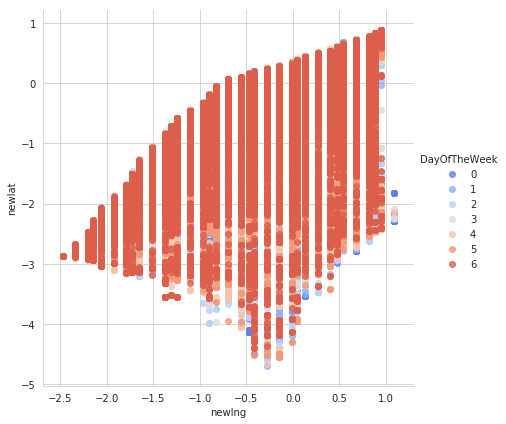

In [13]:
import seaborn as sns
print('Scatter plot for Level 5 month 4')
sns.set_style('whitegrid')
sns.lmplot('newlng','newlat',data=visitors,hue='DayOfTheWeek',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

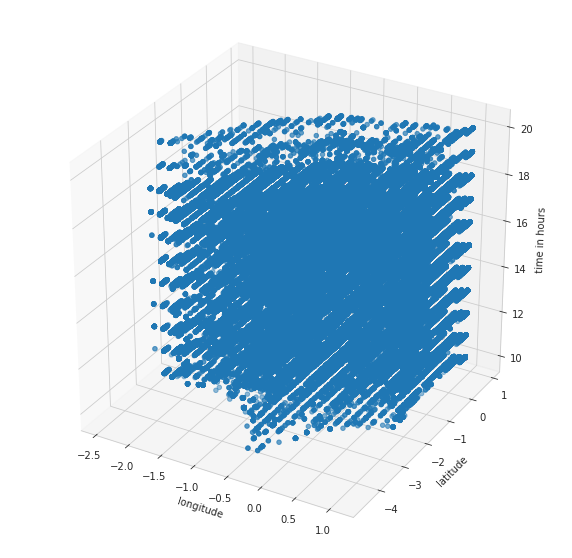

In [14]:
threedee = plt.figure(figsize=(10,10)).gca(projection='3d')
threedee.scatter(visitors['newlng'], visitors['newlat'], visitors['hours'])
threedee.set_xlabel('longitude')
threedee.set_ylabel('latitude')
threedee.set_zlabel('time in hours')
plt.show()

In [15]:
level5month4.day.unique()

array([15, 11, 10,  1, 16, 13,  2, 18, 14,  4,  9, 19, 23,  6, 17,  7, 27,
        3, 22, 21, 24,  8,  5, 20, 12, 26, 30, 25])

In [15]:
level5month4.drop('month',inplace=True,axis=1)

In [18]:
visitors.drop('month',inplace=True,axis=1)
employees.drop('month',inplace=True,axis=1)

In [17]:
day1 = visitors.loc[visitors['day']==1]
day2 = visitors.loc[visitors['day']==2]
day3 = visitors.loc[visitors['day']==3]
day4 = visitors.loc[visitors['day']==4]
day5 = visitors.loc[visitors['day']==5]
day6 = visitors.loc[visitors['day']==6]
day7 = visitors.loc[visitors['day']==7]
day8 = visitors.loc[visitors['day']==8]
day9 = visitors.loc[visitors['day']==9]
day10 = visitors.loc[visitors['day']==10]
day11 = visitors.loc[visitors['day']==11]
day12 = visitors.loc[visitors['day']==12]
day13 = visitors.loc[visitors['day']==13]
day14 = visitors.loc[visitors['day']==14]
day15 = visitors.loc[visitors['day']==15]
day16 = visitors.loc[visitors['day']==16]
day17 = visitors.loc[visitors['day']==17]
day18 = visitors.loc[visitors['day']==18]
day19 = visitors.loc[visitors['day']==19]
day20 = visitors.loc[visitors['day']==20]
day21 = visitors.loc[visitors['day']==21]
day22 = visitors.loc[visitors['day']==22]
day23 = visitors.loc[visitors['day']==23]
day24 = visitors.loc[visitors['day']==24]
day25 = visitors.loc[visitors['day']==25]
day26 = visitors.loc[visitors['day']==26]
day27 = visitors.loc[visitors['day']==27]
day28 = visitors.loc[visitors['day']==28]
day29 = visitors.loc[visitors['day']==29]
day30 = visitors.loc[visitors['day']==30]

In [18]:
day1.head()

,timestamp,hours,day,DayOfTheWeek,newlat,newlng
64603,2018-04-01 11:38:36,11,1,6,-0.378369,-0.472108
64604,2018-04-01 10:34:34,10,1,6,-0.791688,-0.472108
64605,2018-04-01 13:36:30,13,1,6,0.035907,-0.472108
64606,2018-04-01 13:40:15,13,1,6,-0.791688,-0.472108
64612,2018-04-01 14:24:58,14,1,6,-0.797429,-0.472108


In [19]:
day30.head()

,timestamp,hours,day,DayOfTheWeek,newlat,newlng
64724,2018-04-30 18:41:04,18,30,0,-0.809867,-0.472108
64776,2018-04-30 18:21:49,18,30,0,-2.635360,-1.648896
64777,2018-04-30 18:53:47,18,30,0,-2.400954,-1.648896
64778,2018-04-30 18:44:30,18,30,0,-2.079484,-1.648896
65197,2018-04-30 18:45:09,18,30,0,-0.873969,-1.375225


In [20]:
day1.drop(['timestamp','day','DayOfTheWeek'],inplace=True,axis=1)

In [21]:
day1.head()

,hours,newlat,newlng
64603,11,-0.378369,-0.472108
64604,10,-0.791688,-0.472108
64605,13,0.035907,-0.472108
64606,13,-0.791688,-0.472108
64612,14,-0.797429,-0.472108


In [22]:
day2.drop(['timestamp','day','DayOfTheWeek'],inplace=True,axis=1)
day3.drop(['timestamp','day','DayOfTheWeek'],inplace=True,axis=1)
day4.drop(['timestamp','day','DayOfTheWeek'],inplace=True,axis=1)
day5.drop(['timestamp','day','DayOfTheWeek'],inplace=True,axis=1)
day6.drop(['timestamp','day','DayOfTheWeek'],inplace=True,axis=1)

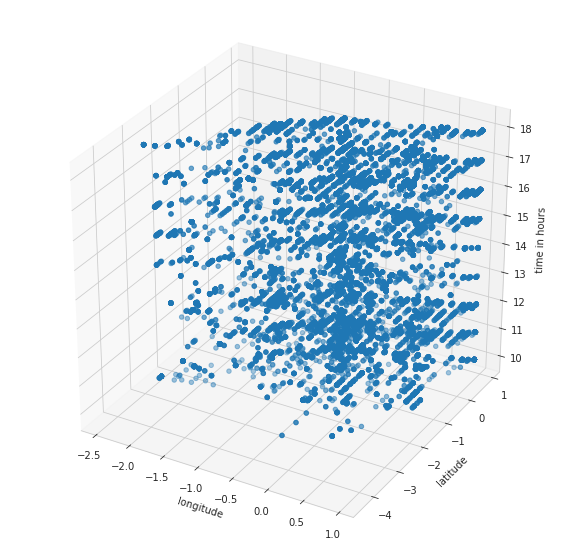

In [23]:
threedee = plt.figure(figsize=(10,10)).gca(projection='3d')
threedee.scatter(day1['newlng'], day1['newlat'], day1['hours'])
threedee.set_xlabel('longitude')
threedee.set_ylabel('latitude')
threedee.set_zlabel('time in hours')
plt.show()

In [23]:
visitors.drop('timestamp',inplace=True,axis=1)

In [24]:
visitors.head()

,hours,day,DayOfTheWeek,newlat,newlng
0,10,13,4,-0.650088,-0.472108
1,11,13,4,-0.652958,-0.472108
2,12,13,4,-0.666353,-0.472108
3,12,6,4,-0.014801,-0.472108
4,12,6,4,-0.028196,-0.472108


In [19]:
visit.head()

,lat,lng,hours,day
0,1.290706,103.851616,10,13
1,1.290705,103.851616,11,13
2,1.290704,103.851616,12,13
3,1.290772,103.851616,12,6
4,1.290771,103.851616,12,6


In [21]:
visit.shape

(463346, 4)

In [33]:
visit.drop('day',inplace=True,axis = 1)

In [35]:
visit.shape

(463346, 3)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
scaled_visit = scaler.fit_transform(visit)

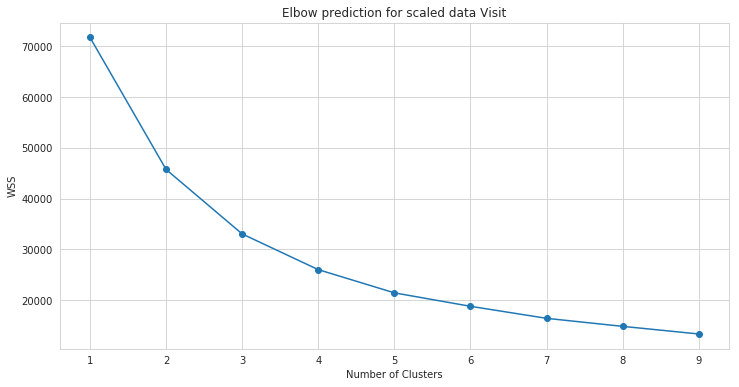

In [38]:
cluster_range = range(1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters)
    clusters.fit(scaled_visit)
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow prediction for scaled data Visit')
plt.show()

In [30]:
from sklearn.cluster import DBSCAN
from pylab import rcParams
from collections import Counter

In [34]:
DBscan_model = DBSCAN(eps=0.8,min_samples=300).fit(visit)
DBscan_model

KeyboardInterrupt: 

In [31]:
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [32]:
outliers_df = pd.DataFrame(visit)
print(Counter(DBscan_model.labels_))
print(len(Counter(DBscan_model.labels_)))
print('***********************************************************************************')
print(outliers_df[DBscan_model.labels_ == -1])

Counter({123: 5217, 94: 4551, 144: 4092, 124: 4007, 103: 3921, 71: 3896, 131: 3878, 145: 3774, 43: 3667, 42: 3648, 72: 3613, 21: 3493, 55: 3453, 63: 3402, 151: 3281, 209: 3277, 147: 3256, 122: 3252, 66: 3225, 77: 3224, 47: 3207, 130: 3202, 49: 3193, 3: 3179, 7: 3176, 95: 3147, 92: 3071, 112: 3056, 81: 3043, 58: 3035, 158: 3020, 242: 3000, 62: 2955, 101: 2941, 73: 2925, 79: 2871, 90: 2851, 65: 2839, 157: 2835, 118: 2791, 173: 2780, 74: 2760, 20: 2758, 75: 2712, 68: 2710, 93: 2695, 5: 2589, 177: 2576, 176: 2541, 41: 2539, 88: 2513, 64: 2509, 109: 2489, 44: 2467, 83: 2466, 116: 2463, 139: 2463, 69: 2456, 27: 2454, 156: 2400, 102: 2390, 191: 2363, 84: 2322, 60: 2260, 22: 2258, 51: 2256, 50: 2230, 119: 2215, 153: 2207, 172: 2193, 182: 2181, 161: 2174, 67: 2173, 214: 2171, 132: 2164, 187: 2131, 57: 2121, 233: 2114, 170: 2091, 110: 2084, 222: 2074, 155: 2062, 70: 2058, 91: 2043, 108: 2036, 125: 2029, 167: 2024, 24: 2018, 35: 2012, 52: 2008, 174: 1997, 39: 1985, 206: 1985, 80: 1982, 235: 1951,

In [34]:
X_scaled = scaler.fit_transform(day1_trial)

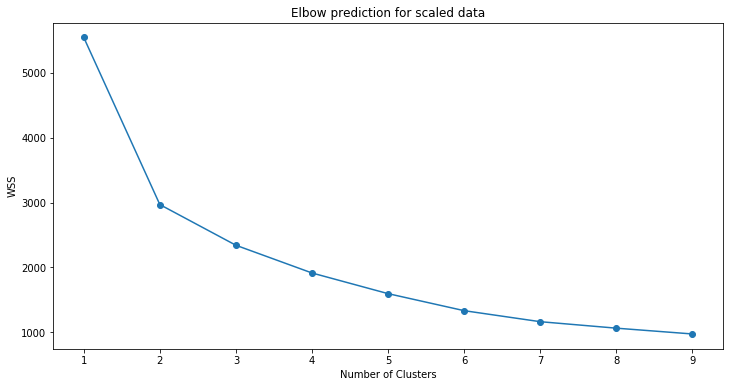

In [35]:
cluster_range = range(1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters)
    clusters.fit(X_scaled)
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow prediction for scaled data')
plt.show()

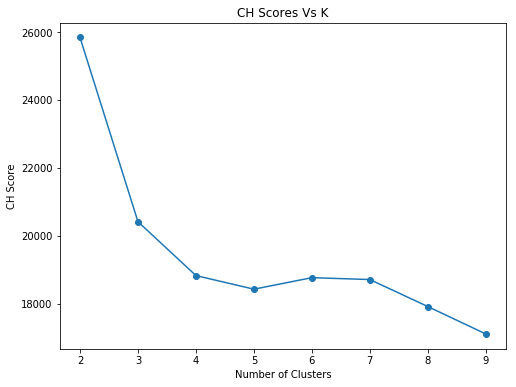

In [53]:
cluster_range = range(2, 10)
ch_score = []

for num_clusters in cluster_range:
    kmean = KMeans(n_clusters=num_clusters).fit(X_scaled)
    labels = kmean.labels_
    score = calinski_harabaz_score(X_scaled,labels)
    ch_score.append(score)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "ch_scores": ch_score } )
plt.figure(figsize=(8,6))
plt.plot( clusters_df.num_clusters, clusters_df.ch_scores, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('CH Score')
plt.title('CH Scores Vs K')
plt.show()

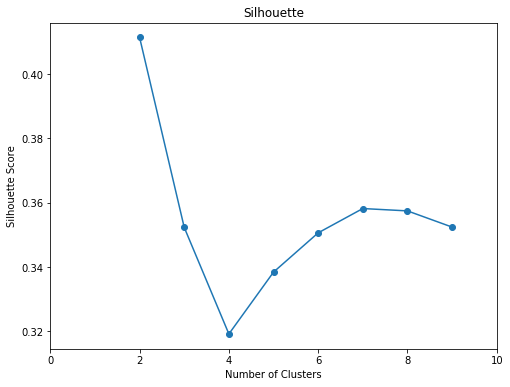

In [54]:
cluster_range = range(2, 10)
sil_score = []

for num_clusters in cluster_range:
    kmean = KMeans(n_clusters=num_clusters).fit(X_scaled)
    labels = kmean.labels_
    score = silhouette_score(X_scaled,labels)
    sil_score.append(score)
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "sil_scores": sil_score } )
plt.figure(figsize=(8,6))
plt.plot( clusters_df.num_clusters, clusters_df.sil_scores, marker = "o" )
plt.xlim(0,10)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show()

In [39]:
vis_kmean = KMeans(n_clusters=2).fit(X_scaled)

In [40]:
la = vis_kmean.labels_

In [41]:
cent = vis_kmean.cluster_centers_

In [42]:
cent

array([[0.71461914, 0.60406308, 0.7609139 ],
       [0.7276792 , 0.582983  , 0.16957877]])

In [43]:
ch_score = calinski_harabaz_score(X_scaled,la)

In [44]:
ch_score

25838.010753391565

In [45]:
sil_score = silhouette_score(X_scaled,la,metric='euclidean')

In [46]:
sil_score

0.41142782648009524

In [47]:
davis_bounding = davies_bouldin_score(X_scaled, la)  

In [48]:
davis_bounding

0.9551185688218617

In [40]:
kmeans = KMeans(init='k-means++', n_clusters=3).fit(scaled_visit)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
labels_visit = kmeans.labels_

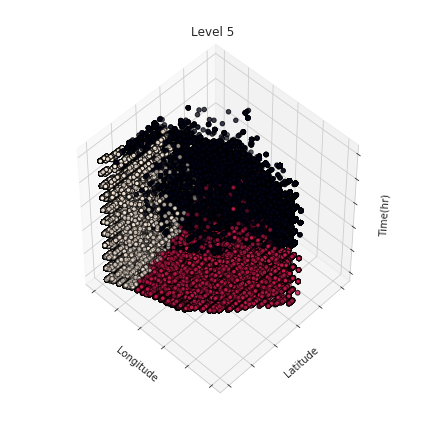

In [54]:
fig = plt.figure(figsize=(6, 6))
ax1 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax1.scatter(scaled_visit[:,1], scaled_visit[:,0], scaled_visit[:,2],
           c=labels_visit.astype(np.float), edgecolor='k')
ax1.w_xaxis.set_ticklabels([])
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Time(hr)')
ax1.set_title('Level 5')
ax1.dist = 12

fig.show()

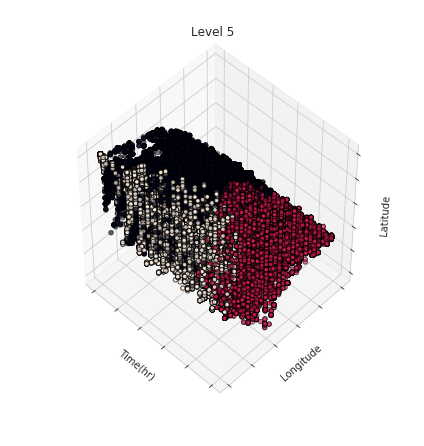

In [55]:
fig = plt.figure(figsize=(6, 6))
ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax2.scatter(scaled_visit[:,2], scaled_visit[:,1], scaled_visit[:,0],
           c=labels_visit.astype(np.float), edgecolor='k')
ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])
ax2.set_xlabel('Time(hr)')
ax2.set_ylabel('Longitude')
ax2.set_zlabel('Latitude')
ax2.set_title('Level 5')
ax2.dist = 12
fig.show()

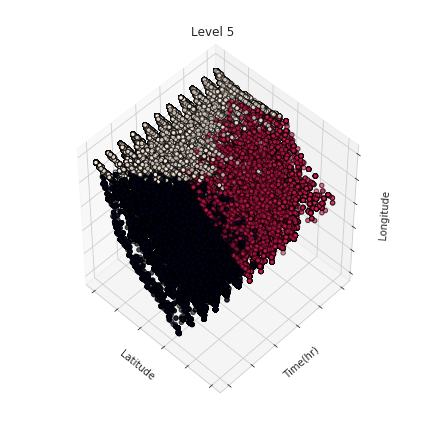

In [56]:
fig = plt.figure(figsize=(6, 6))
ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax2.scatter(scaled_visit[:,0], scaled_visit[:,2], scaled_visit[:,1],
           c=labels_visit.astype(np.float), edgecolor='k')
ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])
ax2.set_ylabel('Time(hr)')
ax2.set_zlabel('Longitude')
ax2.set_xlabel('Latitude')
ax2.set_title('Level 5')
ax2.dist = 12
fig.show()

In [59]:
ch_score = calinski_harabaz_score(scaled_visit,labels_visit)
sil_score = silhouette_score(scaled_visit,labels_visit,metric='euclidean')
davis_bounding = davies_bouldin_score(scaled_visit, labels_visit)  

In [63]:
print("\n\n\t\t\t********Evaluation of model********")
print('\n\tCH Index\t\tSilhoutte Coefficient\tDavies Boulding Index')
print('\t'+str(ch_score)+'\t'+str(sil_score)+'\t'+str(davis_bounding))
print('\n\n')



			********Evaluation of model********

	CH Index		Silhoutte Coefficient	Davies Boulding Index
	271511.4275128896	0.3461620777270993	1.0020983906423302





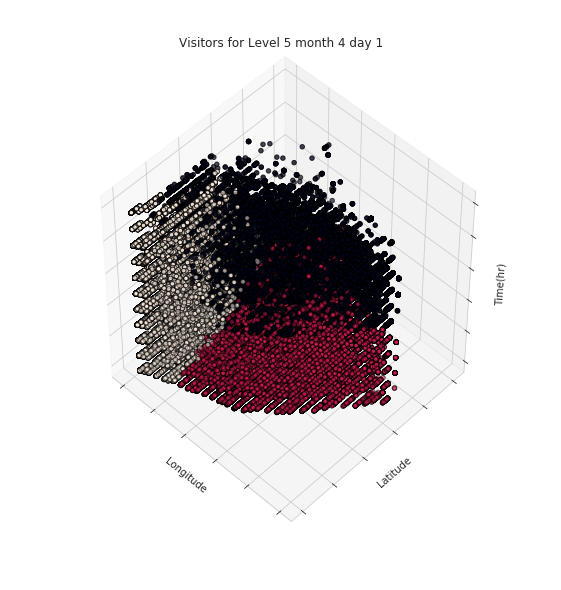

In [44]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(scaled_visit[:,1], scaled_visit[:,0], scaled_visit[:,2],
           c=labels_visit.astype(np.float), edgecolor='k')
# ax.scatter(cent[:, 1], cent[:, 0],cent[:,2], marker='*', s=300,
#             c='r')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time(hr)')
ax.set_title('Visitors for Level 5 month 4 day 1')
ax.dist = 12
fig.show()

In [ ]:
#Evaluation of models

In [55]:
from sklearn.decomposition import PCA

In [74]:
reduced_data = PCA(n_components=2).fit_transform(X_scaled)
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [75]:
lapca = kmeans.labels_
lapca

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

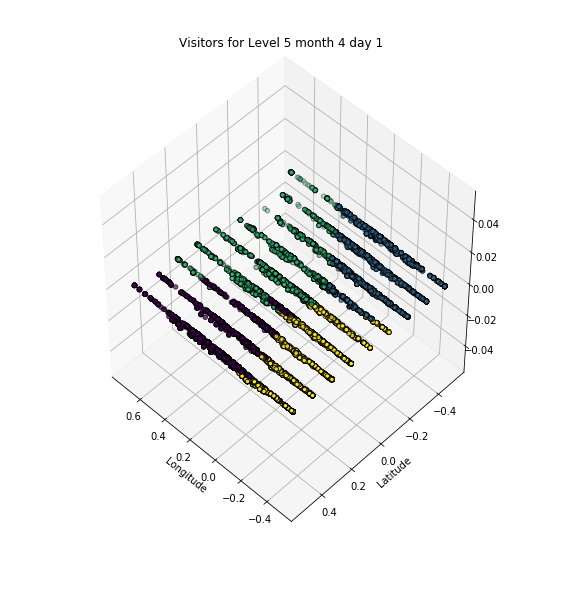

In [76]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_data[:,1], reduced_data[:,0],
           c=lapca.astype(np.float), edgecolor='k')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# ax.set_zlabel('Time(hr)')
ax.set_title('Visitors for Level 5 month 4 day 1')
ax.dist = 12
fig.show()

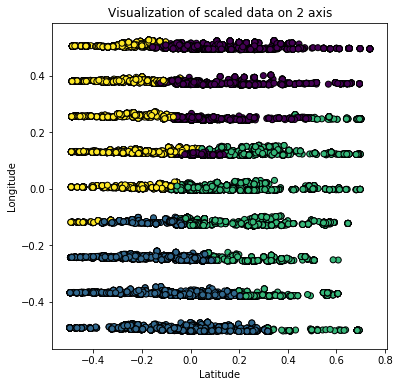

In [77]:
plt.figure(figsize=(6, 6))
plt.scatter(reduced_data[:,1], reduced_data[:,0],
           c=lapca.astype(np.float), edgecolor='k')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Visualization of scaled data on 2 axis');

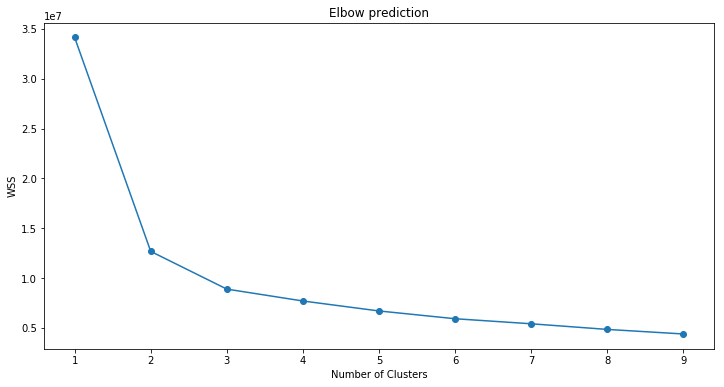

In [25]:
#for visitors
cluster_range = range(1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters)
    clusters.fit(visitors)
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow prediction')
plt.show()

In [26]:
visitors_kmean = KMeans(n_clusters=3).fit(visitors)
labels_visitors = visitors_kmean.labels_

In [27]:
visitors.columns

Index(['hours', 'day', 'DayOfTheWeek', 'newlat', 'newlng'], dtype='object')

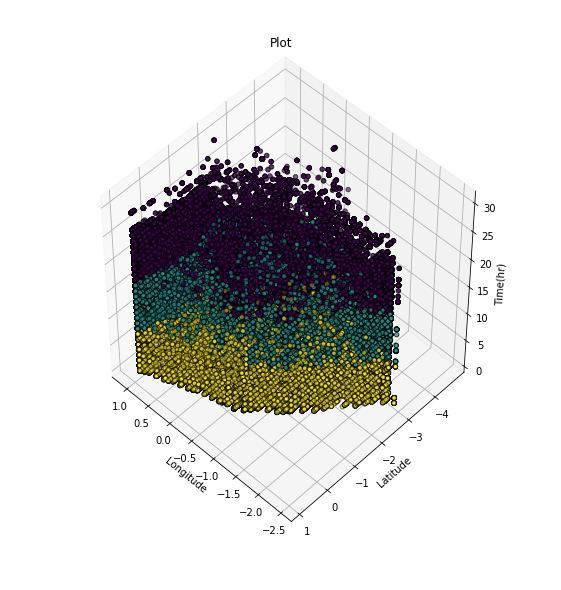

In [28]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(visitors['newlng'], visitors['newlat'], visitors['day'],
           c=labels_visitors.astype(np.float), edgecolor='k')
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time(hr)')
ax.set_title('Visitors for Level 5 month 4')
ax.dist = 12
fig.show()

In [78]:
day1.shape

(29785, 6)

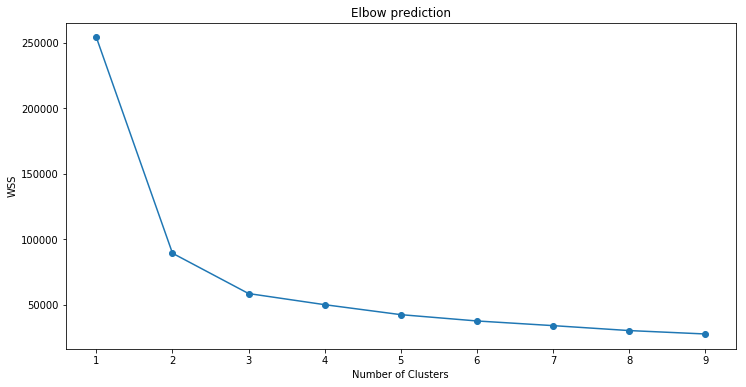

In [29]:
#elbow method to determine number of clusters
cluster_range = range(1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters)
    clusters.fit(day1)
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow prediction')
plt.show()

In [30]:
kmean = KMeans(n_clusters=3).fit(day1)
labels = kmean.labels_
y_kmeans = kmean.predict(day1)
centroids = kmean.cluster_centers_
clust_labels, cent = labels,centroids
kmeans = pd.DataFrame(clust_labels)

In [31]:
kmean.inertia_

58625.48090437972

In [32]:
kmean.transform(day1)

array([[0.10043583, 6.09077263, 3.10541279],
       [1.03069284, 7.09012092, 4.08318385],
       [2.08332291, 4.13462723, 1.33868605],
       ...,
       [6.06225265, 0.65139874, 3.02317677],
       [7.05894135, 1.15868916, 4.01786242],
       [7.05894135, 1.15868916, 4.01786242]])

In [33]:
kmean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [53]:
day1['labels'] = clust_labels

In [54]:
day1.head()

,hours,newlat,newlng,labels
64603,11,-0.378369,-0.472108,2
64604,10,-0.791688,-0.472108,2
64605,13,0.035907,-0.472108,1
64606,13,-0.791688,-0.472108,1
64612,14,-0.797429,-0.472108,1


In [55]:
clust1 = day1.loc[day1['labels'] == 0]
clust2 = day1.loc[day1['labels'] == 1]
clust3 = day1.loc[day1['labels'] == 2]

In [56]:
labels

array([2, 2, 1, ..., 0, 0, 0], dtype=int32)

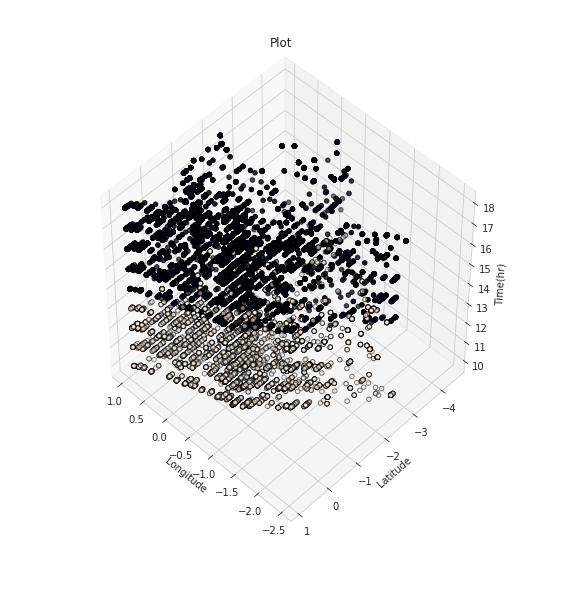

In [68]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(day1['newlng'], day1['newlat'], day1['hours'],
           c=labels.astype(np.float), edgecolor='k')
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time(hr)')
ax.set_title('Plot')
ax.dist = 12
fig.show()